# Capture Your Tail Risk With The Omega Ratio

The Omega ratio is a weighted ratio of gains and losses above a threshold return. It captures more information about returns than similar metrics like the Sharpe ratio.

It does this by adding up the area under the distribution around the threshold return. The area above the threshold measures the weight of the gains. The area below the threshold measures the weight of the losses. The Omega ratio is the positive area divided by the negative area.

If this sounds abstract, don’t worry. It’s straightforward in Python.


## Without Considering The Omega Ratio, You Miss Important Information About Risk.

Sophisticated investors like hedge funds use the Omega ratio. They use it because alternative investments have long-tail risks not measured by other metrics like the Sharpe ratio. Even if you’re not investing in exotic derivatives, the Omega ratio is useful.

A simple test shows us AAPL’s returns are not normally distributed.

The skew (which measures symmetry) is -0.01. A normal distribution has skew of 0. The kurtosis (which measures outliers) is 5.3. A normal distribution has kurtosis of 3.

Using performance metrics that don’t take the entire distribution into consideration misses important information about risk. Use the Omega ratio to capture it.

Here's what we'll do:

1. Get stock price data
2. Compute the Omega ratio
3. Assess AAPL with the Omega ratio

## Step 1: Get The Data

Start by importing the libraries and getting the data. I like to use yfinance for getting stock data.

In [1]:
import numpy as np

from openbb_terminal.sdk import openbb

Grab the data and compute returns.

In [2]:
data = openbb.stocks.load("AAPL", start_date="2010-01-01", end_date="2021-12-31")

Loading Daily data for AAPL with starting period 2010-01-04.

In [3]:
returns = data["Adj Close"].pct_change()

## Step 2: Compute The Omega Ratio

Creating a function for the Omega ratio in Python is straightforward.

In [4]:
def omega_ratio(returns, required_return=0.0):
    """Determines the Omega ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    required_return : float, optional
        Minimum acceptance return of the investor. Threshold over which to
        consider positive vs negative returns. It will be converted to a
        value appropriate for the period of the returns. E.g. An annual minimum
        acceptable return of 100 will translate to a minimum acceptable
        return of 0.018.

    Returns
    -------
    omega_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Omega_ratio for more details.
    """

    return_threshold = (1 + required_return) ** (1 / 252) - 1

    returns_less_thresh = returns - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

First, annualize the return threshold. (The ** syntax in Python is the power operator i.e. 2**2 is 2 squared.) Then, subtract the threshold from the returns. Finally, add up the positive returns less the threshold and negative returns less the threshold.

The Omega ratio is the sum of positive returns less the threshold divided by the sum of negative returns less the threshold.

## Step 3: Use The Omega Ratio
When analyzing a stock, investment returns, or strategy performance, start with the return distribution. If the returns have skew and kurtosis, consider using the Omega ratio.

Going back to the AAPL example, create a distribution of returns in one line of code.

<AxesSubplot: >

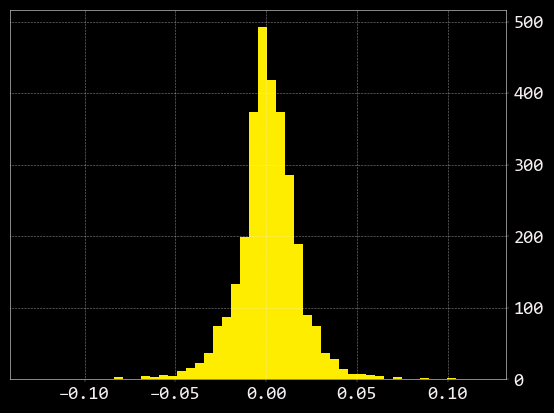

In [5]:
returns.hist(bins=50)

You can check the skew and kurtosis.



In [6]:
returns.skew()

-0.10155067279977033

In [7]:
returns.kurtosis()

5.796382407350554

And finally, compute the Omega ratio.



In [8]:
omega_ratio(returns, 0.07)

1.1722399463628774

Here, I use a threshold of 7% which is the historical average annual return of the stock market. The Omega ratio is 1.2. Taking into consideration skew and kurtosis, AAPL’s gains outperformed the losses by a factor of 1.2.

Since asset returns are not normally distributed, use the Omega ratio to capture risks other metrics don’t.
